In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')

In [3]:
stopien = np.pi/180
R = 0.149
D_alpha = np.sqrt((stopien**2)/3 + (stopien)/2**2/3)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


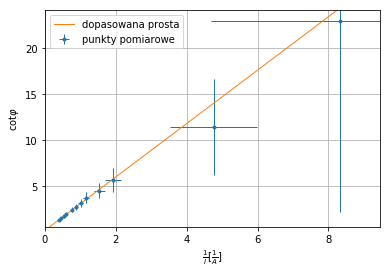

Dla 1 zwoju  H_g = 9.746 +/- 0.136


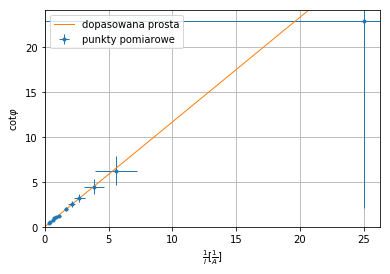

Dla 3 zwoju  H_g = 11.705 +/- 0.153


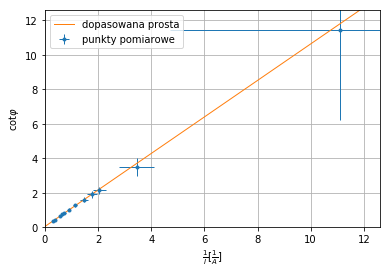

Dla 5 zwoju  H_g = 17.749 +/- 0.070


In [10]:
def analiza(numer):
    N = pd.read_csv(f'Zwoje_{numer}.csv', sep=',\s', engine='python')
    D_amper = N['I[A]']*0.02+0.05
    nad_I = 1/N['I[A]']
    ctan = 1/np.tan(N['alpha[o]']*stopien)
    D_ctan = D_alpha/np.sin(N['alpha[o]']*stopien)**2
    D_nad_I = D_amper/N['I[A]']**2
    plt.errorbar(nad_I,ctan,D_ctan,D_nad_I,'.',label='punkty pomiarowe',elinewidth=1)
    plt.ylim(np.floor(ctan.min())*0.5,np.ceil(ctan.max())*1.05)
    plt.xlim(np.floor(nad_I.min())*0.5,np.ceil(nad_I.max())*1.05)
    zakres = np.linspace(np.floor(nad_I.min())*0.5,np.ceil(nad_I.max())*1.05)
    prosta, kowariancja = np.polyfit(nad_I, ctan,1,cov=True,w=1/D_ctan)
    plt.plot(zakres, np.polyval(prosta, zakres),label='dopasowana prosta',linewidth=1)
    plt.grid()
    plt.xlabel(r'$\frac{1}{I}[\frac{1}{A}]$')
    plt.ylabel(r'$\cot{\varphi}$')
    plt.legend(loc='best')
     # plt.savefig(f"wykres_{numer}.eps")
    plt.savefig(f"wykres_{numer}.png")
    plt.show()
    with open(f"tabelka_{numer}.tex", "w") as file:
        dataframe = pd.DataFrame()
        dataframe["$\varphi[^\circ]$"] = N['alpha[o]']
        dataframe["I[A]"] = N['I[A]']
        dataframe["$\Delta$I[A]"] = D_amper
        dataframe["$\frac{1}{I}$"] = nad_I
        dataframe["$\Delta \frac{1}{I}$"] = D_nad_I
        dataframe["$\cot{\varphi}$"] = ctan
        dataframe["$\Delta \cot{\varphi}$"] = D_ctan
        file.write(dataframe.to_latex())
    H_g = prosta[0]*numer/(2*R)
    D_H_g = np.sqrt( kowariancja[0,0]*numer/(2*R))
    print(f'Dla {numer} zwoju  H_g = {H_g:.3f} +/- {D_H_g:.3f}')

for numer in [1, 3, 5]:
    analiza(numer)